In [20]:
from polyhedral_analysis.polyhedra_recipe import PolyhedraRecipe
from polyhedral_analysis.octahedral_analysis import isomer_is_cis, isomer_is_fac, isomer_is_mer, isomer_is_trans
from polyhedral_analysis.configuration import Configuration

from pymatgen.core import Structure
from collections import Counter

# from itertools import permutations

from figure_formatting import figure_formatting as ff

ff.set_formatting()

colors = {'blue': '#264653',
          'green': '#2A9D8F',
          'yellow': '#E9C46A',
          'light orange': '#F4A261',
          'dark orange': '#E76F51',
          'dusky pink': '#F3B5A5'}

In [2]:
s1 = Structure.from_file('./config_1/opt.vasp')
s2 = Structure.from_file('./config_2/opt.vasp')
s3 = Structure.from_file('./config_3/opt.vasp')
s4 = Structure.from_file('./config_4/opt.vasp')

In [3]:
s1, s2, s3, s4

(Structure Summary
 Lattice
     abc : 15.192 15.192 15.192
  angles : 90.0 90.0 90.0
  volume : 3506.2659578880002
       A : 15.192 0.0 0.0
       B : 0.0 15.192 0.0
       C : 0.0 0.0 15.192
     pbc : True True True
 PeriodicSite: Ti (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
 PeriodicSite: Ti (0.0, 0.0, 7.596) [0.0, 0.0, 0.5]
 PeriodicSite: Ti (0.0, 7.596, 0.0) [0.0, 0.5, 0.0]
 PeriodicSite: Ti (0.0, 7.596, 7.596) [0.0, 0.5, 0.5]
 PeriodicSite: Ti (7.596, 0.0, 0.0) [0.5, 0.0, 0.0]
 PeriodicSite: Ti (7.596, 0.0, 7.596) [0.5, 0.0, 0.5]
 PeriodicSite: Ti (7.596, 7.596, 0.0) [0.5, 0.5, 0.0]
 PeriodicSite: Ti (7.596, 7.596, 7.596) [0.5, 0.5, 0.5]
 PeriodicSite: Ti (0.0, 0.0, 3.798) [0.0, 0.0, 0.25]
 PeriodicSite: Ti (0.0, 0.0, 11.39) [0.0, 0.0, 0.75]
 PeriodicSite: Ti (0.0, 7.596, 3.798) [0.0, 0.5, 0.25]
 PeriodicSite: Ti (0.0, 7.596, 11.39) [0.0, 0.5, 0.75]
 PeriodicSite: Ti (7.596, 0.0, 3.798) [0.5, 0.0, 0.25]
 PeriodicSite: Ti (7.596, 0.0, 11.39) [0.5, 0.0, 0.75]
 PeriodicSite: Ti (7.596, 7.59

In [4]:
recipe = PolyhedraRecipe(method='distance cutoff',
                         coordination_cutoff=3.0,
                         central_atoms='Ti',
                         vertex_atoms=['O', 'F'])

In [5]:
c1, c2, c3, c4 = [Configuration(structure=s, recipes=[recipe]) for s in [s1, s2, s3, s4]]

In [9]:
dist = [Counter([p.vertex_count['F'] for p in c.polyhedra]) for c in [c1, c2, c3, c4]]
dist

[Counter({5: 2, 4: 60, 3: 2}),
 Counter({4: 60, 3: 2, 5: 2}),
 Counter({4: 60, 5: 2, 3: 2}),
 Counter({3: 3, 4: 58, 5: 3})]

In [10]:
from scipy.stats import binom
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [11]:
for c in c1, c2, c3, c4:
    f1 = [p for p in c.polyhedra if p.vertex_count['F'] == 1]
    f0 = [p for p in c.polyhedra if p.vertex_count['F'] == 0]
    f2 = [p for p in c.polyhedra if p.vertex_count['F'] == 2]
    f3 = [p for p in c.polyhedra if p.vertex_count['F'] == 3]
    f4 = [p for p in c.polyhedra if p.vertex_count['F'] == 4]
    f5 = [p for p in c.polyhedra if p.vertex_count['F'] == 5]
    f6 = [p for p in c.polyhedra if p.vertex_count['F'] == 6]
    
    n_F2_trans = sum([isomer_is_trans(p, check=False) for p in f2])
    n_F3_mer = sum([isomer_is_mer(p, check=False) for p in f3])
    n_F4_trans = sum([isomer_is_trans(p, check=False) for p in f4])
    
    print(f'[{len(f0)}] [{len(f1)}] [{n_F2_trans} {len(f2)-n_F2_trans}] [{n_F3_mer} {len(f3)-n_F3_mer}] [{n_F4_trans} {len(f4)-n_F4_trans}] [{len(f5)}] [{len(f6)}]')

[0] [0] [0 0] [0 2] [0 60] [2] [0]
[0] [0] [0 0] [0 2] [0 60] [2] [0]
[0] [0] [0 0] [0 2] [0 60] [2] [0]
[0] [0] [0 0] [0 3] [0 58] [3] [0]


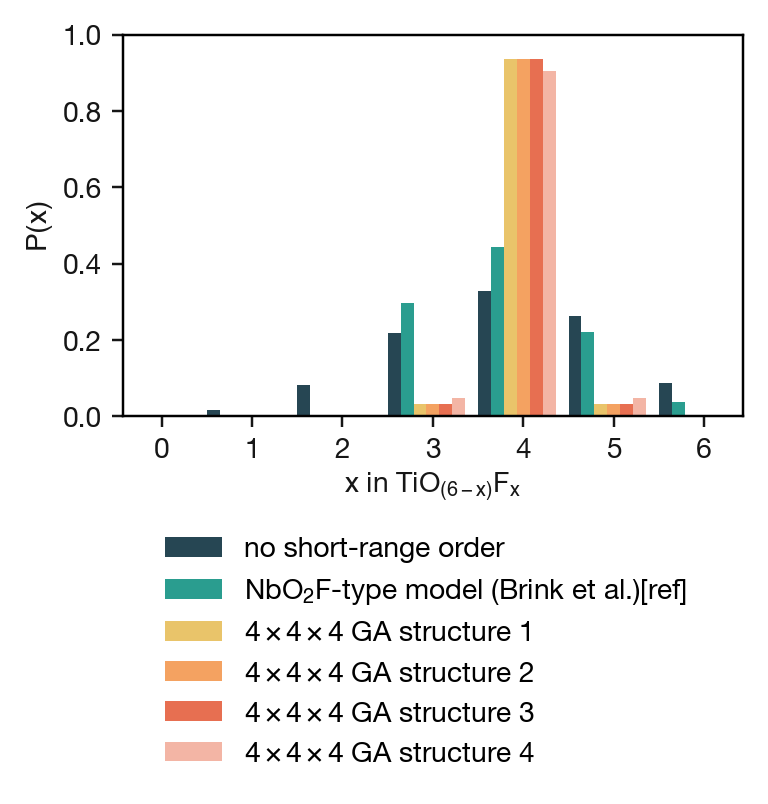

In [32]:
n = 6
p = 2/3
x = np.arange(0,7)
# probabilities of TiO1-xFx coordination for the Brink model → see Brink et al. J. Sol. Stat. Chem 2002.
brink = np.array([[0,1,2,3,4,5,6],
                  [0.0, 0.0, 0.0, 8/27, 12/27, 6/27, 1/27]])
width = 1/7

c = [colors['yellow'],
     colors['light orange'],
     colors['dark orange'],
     colors['dusky pink']]

plt.bar(x-width*3, binom.pmf(x, n, p), label='no short-range order', width=width, color=colors['blue'])
plt.bar(brink[0]-width*2, brink[1], label=r'NbO$_2$F-type model (Brink et al.)[ref]', width=width, color=colors['green'])
for i, d in enumerate(dist, 1):
    dist_array = np.array(sorted([(k, v) for k, v in d.items()])).T
    plt.bar(dist_array[0]+width*(i-2), dist_array[1]/sum(dist_array[1]), label=r'$4\times4\times4$ GA structure '+f'{i}', width=width, color=c[i-1])

# plot.bar(r1, a1, width=width1)



plt.legend(loc=(0.05,-0.95))
plt.xlabel(r'$x$ in TiO$_{(6-x)}$F$_x$')
plt.ylabel(r'$P(x)$')
plt.ylim(0,1)
plt.xlim(0-width*3, 6+width*3)
# plt.tight_layout()
plt.savefig('4x4x4_octahedra_vs_Brink.pdf')
plt.show()

In [ ]:
# Read VASP optimised structures and plot bond length and bond angle distributions
s1 = Structure.from_file('./config_1/POSCAR')
s2 = Structure.from_file('./config_2/POSCAR')
s3 = Structure.from_file('./config_3/POSCAR')
s4 = Structure.from_file('./config_4/POSCAR')

In [ ]:
c1, c2, c3, c4 = [Configuration(structure=s, recipes=[recipe]) for s in [s1, s2, s3, s4]]

In [ ]:
from itertools import combinations
from scipy.ndimage import gaussian_filter1d 

# for each configuration, for each polyhedron, 
# loop over pairs of vertices and calculate their X–Ti–X bond angles
angles = {'OO': [],
          'OF': [],
          'FF': []}

distances = {'O': [],
             'F': []}

for c in c1, c2, c3, c4:
    for p in c1.polyhedra:
        for l, a in zip(combinations(p.vertex_labels, 2), p.angles()):
            angles[''.join(sorted(l)[::-1])].append(a)
        for d, l in p.vertex_distances_and_labels():
            distances[l].append(d)

In [ ]:
OO_hist = np.histogram(angles['OO'], bins=180, range=[0, 185], density=True)
OF_hist = np.histogram(angles['OF'], bins=180, range=[0, 185], density=True)
FF_hist = np.histogram(angles['FF'], bins=180, range=[0, 185], density=True)

TiO_hist = np.histogram(distances['O'], bins=200, range=[0, 5], density=True)
TiF_hist = np.histogram(distances['F'], bins=200, range=[0, 5], density=True)

In [ ]:
theta = (OO_hist[1][1:]+OO_hist[1][:-1])/2
sigma = 2.0

fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].fill_between(theta, gaussian_filter1d(OO_hist[0], sigma=sigma), label='O–Ti–O', alpha=0.5)
axs[1].fill_between(theta, gaussian_filter1d(OF_hist[0], sigma=sigma), label='O–Ti–F', alpha=0.5)
axs[2].fill_between(theta, gaussian_filter1d(FF_hist[0], sigma=sigma), label='F–Ti–F', alpha=0.5)
fig.subplots_adjust(hspace=0)
plt.xlim(70, 180)
for i in range(3):
    axs[i].vlines(x=90.0, ymin=-0.2, ymax=0.25, colors='black', linestyle='--')
    axs[i].set_ylim(0.0, 0.25)
    axs[i].set_yticks([0.0, 0.1])
    axs[i].legend()
axs[2].set_xlabel(r'$\theta(X–Ti–X)$')
axs[0].set_yticks([0.0, 0.1, 0.2])
axs[1].set_ylabel(r'$p(\theta)$')
plt.show()

In [ ]:
theta = (TiO_hist[1][1:]+TiO_hist[1][:-1])/2
sigma = 2.0

fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].fill_between(theta, gaussian_filter1d(TiO_hist[0], sigma=sigma), label='Ti–O', alpha=0.5)
axs[1].fill_between(theta, gaussian_filter1d(TiF_hist[0], sigma=sigma), label='Ti–F', alpha=0.5)
fig.subplots_adjust(hspace=0)
# plt.xlim(70, 180)
for i in range(2):
#     axs[i].vlines(x=90.0, ymin=-0.2, ymax=0.25, colors='black', linestyle='--')
    axs[i].set_ylim(0.0, 7)
#     axs[i].set_yticks([0.0, 0.1])
    axs[i].legend()
axs[1].set_xlabel(r'$r(Ti–X)$')
# axs[0].set_yticks([0.0, 0.1, 0.2])
axs[1].set_ylabel(r'$p(r)$')
plt.show()

In [ ]:
plt.plot(x, OO_hist, label='O–Ti–O')
plt.plot(x, OF_kde(x), label='O–Ti–F')
plt.plot(x, FF_kde(x), label='F–Ti–F')
plt.xlim(70, 180)
plt.legend()
plt.xlabel(r'$\theta(X_i–Ti–X_j)$')
plt.show()

In [ ]:
plt.plot(x, OO_kde)
# plt.hist(angles['OF'], bins=20)
# plt.hist(angles['FF'], bins=20)
plt.xlim(80, 180)
plt.show()
